<a href="https://www.kaggle.com/code/imeldamaretta/modelml-yolov8-ipynb?scriptVersionId=237761669" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mount Google Drive

Only do this if you're using Colab

In [1]:
#from google.colab import drive

#drive.mount('/content/drive')

# Install Necessary Library

In [2]:
'''! pip install ultralytics

! pip install tensorflow

! pip install keras

! pip install roboflow'''

'! pip install ultralytics\n\n! pip install tensorflow\n\n! pip install keras\n\n! pip install roboflow'

# Importing Library

In [3]:
'''from ultralytics import YOLO

import matplotlib.pyplot as plt

import tensorflow as tf

import cv2'''

'from ultralytics import YOLO\n\nimport matplotlib.pyplot as plt\n\nimport tensorflow as tf\n\nimport cv2'

# Downloading and Extracting the Dataset in Zip File

## Importing the Dataset from Roboflow

Importing the dataset straight from Roboflow will automatically extract the zip file

In [4]:
# from google.colab import userdata

#RF_TOKEN = userdata.get('RF_TOKEN')

In [5]:
!pip install roboflow

from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 66.8 MB/s eta 0:00:00


In [6]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
RF_TOKEN = user_secrets.get_secret("RF_TOKEN")

In [7]:
rf = Roboflow(api_key=RF_TOKEN)
project = rf.workspace("florys-ijzit").project("flower-disease-aoxpb")
version = project.version(9)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Flower-Disease-9 in yolov8:: 100%|██████████| 7182/7182 [00:00<00:00, 8327.48it/s]


# Training the Model

In [8]:
!pip install --upgrade ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 25.6 MB/s eta 0:00:00
  Attempting uninstall: ray
    Found existing installation: ray 2.24.0
    Uninstalling ray-2.24.0:
      Successfully uninstalled ray-2.24.0


In [9]:
!pip install git+https://github.com/ultralytics/ultralytics.git@main

  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-jq07002q
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-jq07002q
  Resolved https://github.com/ultralytics/ultralytics.git to commit 0db5d327d0acd8a71b2e16f7f673f6243c8f74dd
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for ultralytics: filename=ultralytics-8.3.127-py3-none-any.whl size=1013261 sha256=33fd1206f6bceeef21c8bb4f926df0a9fd793abde0247e8513663104fc46c071
  Stored in directory: /tmp/pip-ephem-wheel-cache-m2kswey5/wheels/60/db/e5/6abbdd13b4e3d5e2fdcd87690cd8738f842eeb37142fdccb5b
Successfully built ultralytics


In [10]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [11]:
# Load YOLOv8 model
model = YOLO('yolov8n.pt')

# Train on custom dataset
model.train(
    data='/kaggle/working/Flower-Disease-9/data.yaml',
    epochs=100,
    imgsz=640,
    batch=32,
    lr0=0.01,
    optimizer='SGD',
    save=True
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 22.2MB/s]


Ultralytics 8.3.127 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Flower-Disease-9/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True,

100%|██████████| 755k/755k [00:00<00:00, 4.51MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 17.3MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1230.0±321.5 MB/s, size: 45.1 KB)


train: Scanning /kaggle/working/Flower-Disease-9/train/labels... 2978 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2978/2978 [00:02<00:00, 1173.06it/s]


train: New cache created: /kaggle/working/Flower-Disease-9/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 348, len(boxes) = 13435. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 682.5±378.1 MB/s, size: 44.1 KB)


val: Scanning /kaggle/working/Flower-Disease-9/valid/labels... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<00:00, 1301.82it/s]

val: New cache created: /kaggle/working/Flower-Disease-9/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.89G      1.358      3.093      1.516          8        640: 100%|██████████| 94/94 [00:31<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.41it/s]

                   all        317        958       0.42      0.347      0.278      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.38G      1.281      2.081      1.415          9        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.19it/s]

                   all        317        958      0.408      0.355      0.253      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.38G      1.278      1.757        1.4         17        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        317        958      0.446      0.295      0.222       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.38G      1.293      1.682        1.4         27        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.14it/s]

                   all        317        958      0.463      0.352      0.323      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.38G      1.275      1.553      1.392          9        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.29it/s]

                   all        317        958      0.475      0.349      0.286      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.38G      1.246      1.448      1.382         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.57it/s]

                   all        317        958      0.147      0.188      0.132     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.38G       1.24      1.399      1.372         15        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        317        958      0.386      0.182      0.201      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.38G      1.209      1.329      1.347         39        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958      0.389      0.414      0.283      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.38G      1.194      1.267      1.341         23        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958      0.372      0.411       0.39      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.38G      1.178      1.227      1.328         15        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        317        958      0.363      0.418      0.365      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     11/100      4.38G      1.177      1.193       1.33         37        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        317        958      0.418      0.384      0.375      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     12/100      4.38G      1.156      1.161      1.324          6        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        317        958      0.286      0.364      0.295      0.203

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     13/100      4.38G      1.139       1.11      1.304         37        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        317        958      0.517      0.356      0.397      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.38G      1.136      1.092      1.314         13        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        317        958      0.306      0.435      0.315      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.38G      1.126      1.049      1.298         23        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        317        958      0.589      0.378      0.403      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.38G      1.109      1.041      1.287         24        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        317        958      0.314       0.42      0.326       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     17/100      4.38G      1.097      1.001       1.28         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        317        958      0.436      0.401      0.403      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     18/100      4.38G       1.09     0.9859      1.283         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        317        958      0.355      0.387      0.305      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     19/100      4.38G       1.09     0.9787      1.281         18        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        317        958      0.402      0.354      0.402      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.38G      1.079     0.9599      1.271         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        317        958      0.269      0.385      0.313       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     21/100      4.38G      1.075     0.9301      1.268         18        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        317        958      0.368      0.392      0.418       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.38G      1.069     0.9354      1.268         11        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        317        958      0.469      0.343      0.381      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     23/100      4.38G      1.062     0.9118      1.257         22        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        317        958       0.36      0.352      0.341       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     24/100      4.38G       1.05     0.8985      1.248         13        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958       0.35      0.286       0.33      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     25/100      4.38G      1.042     0.8799      1.249         14        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        317        958      0.381      0.391      0.418      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     26/100      4.38G      1.039     0.9167      1.245          3        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        317        958      0.294      0.476       0.35      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     27/100      4.38G       1.04     0.8826      1.254          7        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        317        958      0.454      0.431       0.47       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.38G      1.024     0.8426      1.238         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        317        958      0.282      0.376      0.318      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     29/100      4.38G      1.031      0.843      1.244         11        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        317        958      0.368      0.332      0.335      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     30/100      4.38G      1.014     0.8267       1.23         34        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        317        958      0.424      0.384      0.376      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     31/100      4.38G      1.009       0.82      1.227         18        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        317        958      0.336      0.424      0.339      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.38G     0.9986     0.8131      1.221         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.69it/s]

                   all        317        958      0.535      0.412      0.474      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     33/100      4.38G     0.9976     0.8068       1.22          4        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.62it/s]

                   all        317        958      0.406      0.324      0.379      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     34/100      4.38G      0.991      0.785      1.213         15        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]

                   all        317        958      0.436      0.402      0.436      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     35/100      4.38G     0.9797     0.7718      1.206         27        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        317        958      0.393      0.354      0.375      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     36/100      4.38G     0.9811     0.7769      1.219         11        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.47it/s]

                   all        317        958      0.423      0.356      0.408       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.38G     0.9739     0.7671      1.201         29        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        317        958      0.447      0.427      0.465      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.38G      0.966     0.7434      1.201         20        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        317        958      0.381      0.461      0.369      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.38G     0.9655     0.7411      1.198         22        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        317        958      0.486      0.435      0.457      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.38G     0.9576     0.7679      1.194          3        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958      0.379       0.43       0.39      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     41/100      4.38G      0.945     0.7437      1.186          6        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        317        958      0.398      0.385      0.402      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     42/100      4.38G     0.9499     0.7298      1.191         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        317        958      0.306      0.305      0.324      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     43/100      4.38G     0.9477      0.722      1.186         34        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958      0.382      0.365      0.375       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.38G     0.9421     0.7167      1.184         34        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        317        958      0.335      0.418      0.362      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     45/100      4.38G     0.9236     0.7073      1.174         14        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.85it/s]

                   all        317        958      0.466      0.388      0.438      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     46/100      4.38G     0.9298     0.7052      1.175         41        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958      0.452      0.404       0.45      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     47/100      4.38G     0.9191     0.6935      1.173         21        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        317        958      0.433      0.384      0.422      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.38G     0.9063     0.6719      1.163         20        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        317        958       0.44        0.4      0.444       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     49/100      4.38G     0.9092      0.693      1.168          5        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        317        958      0.296      0.399      0.337      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     50/100      4.38G     0.9048     0.6664       1.16         13        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        317        958      0.326      0.386      0.353      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     51/100      4.38G     0.9015     0.6707      1.165         13        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        317        958      0.389      0.397      0.371      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     52/100      4.38G     0.9049     0.6738      1.165         17        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        317        958      0.321      0.364      0.322      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     53/100      4.38G     0.8912     0.6474      1.154         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        317        958      0.491      0.393      0.462       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     54/100      4.38G     0.8877     0.6576      1.159         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        317        958      0.455      0.421      0.457      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.38G     0.8923     0.6517      1.159         16        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        317        958      0.361        0.4      0.337      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     56/100      4.38G     0.8738     0.6376      1.143         19        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.67it/s]

                   all        317        958      0.455      0.517      0.511      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.38G     0.8697      0.632      1.146         16        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        317        958        0.4      0.406      0.425      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     58/100      4.38G     0.8691     0.6591      1.146         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        317        958      0.366      0.458      0.397      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.38G     0.8571     0.6137       1.13         14        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.70it/s]

                   all        317        958      0.507      0.383      0.401      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     60/100      4.38G     0.8551     0.6156      1.131         17        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        317        958      0.427      0.409      0.448      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     61/100      4.38G     0.8467     0.6141      1.136         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        317        958      0.457      0.421      0.435        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.38G      0.851     0.6083      1.135         23        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        317        958       0.46      0.417      0.453      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     63/100      4.38G     0.8428     0.6077      1.128         13        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        317        958      0.445      0.416      0.417       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     64/100      4.38G     0.8468     0.6058      1.136         19        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.89it/s]

                   all        317        958       0.39      0.425      0.411      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     65/100      4.38G       0.84     0.5994       1.13         16        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.76it/s]

                   all        317        958      0.442      0.376      0.398      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     66/100      4.38G     0.8326     0.6062      1.127          8        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        317        958        0.4      0.423      0.415      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.38G     0.8389     0.5953      1.128         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        317        958       0.42      0.437       0.41      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     68/100      4.38G     0.8313     0.5922      1.124         15        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        317        958      0.493      0.391      0.463      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     69/100      4.38G     0.8146     0.5709      1.108         14        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.83it/s]

                   all        317        958      0.401      0.454      0.406      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     70/100      4.38G     0.8242     0.6006      1.118         16        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        317        958      0.499      0.389      0.464      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     71/100      4.38G     0.8081     0.5803      1.113          8        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.41it/s]

                   all        317        958      0.543      0.421      0.489       0.33

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     72/100      4.38G     0.8136     0.5729      1.112         10        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.38it/s]

                   all        317        958      0.437       0.41      0.413      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     73/100      4.38G     0.8072     0.5744      1.107          9        640: 100%|██████████| 94/94 [00:29<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.56it/s]

                   all        317        958      0.428      0.433      0.429      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     74/100      4.38G     0.7989     0.5561      1.106         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.72it/s]

                   all        317        958      0.465      0.368      0.439      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.38G     0.7955     0.5658        1.1         22        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        317        958      0.384      0.377      0.374      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     76/100      4.38G     0.7939     0.5641        1.1         39        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958      0.526      0.402      0.453      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     77/100      4.38G     0.7941     0.5665      1.104         25        640: 100%|██████████| 94/94 [00:30<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958      0.339      0.402      0.372      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     78/100      4.38G     0.7752     0.5358      1.086         26        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.80it/s]

                   all        317        958      0.396       0.43      0.385       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     79/100      4.38G     0.7754     0.5456       1.09         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.84it/s]

                   all        317        958      0.442      0.397      0.439      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     80/100      4.38G     0.7801     0.5498      1.094         24        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.77it/s]

                   all        317        958      0.437      0.384      0.407      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     81/100      4.38G     0.7862     0.5464      1.113          9        640: 100%|██████████| 94/94 [00:30<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.75it/s]

                   all        317        958       0.47        0.4      0.456       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     82/100      4.38G      0.763     0.5398      1.084          8        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.78it/s]

                   all        317        958      0.448      0.412       0.42       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.38G     0.7729     0.5532      1.095         13        640: 100%|██████████| 94/94 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        317        958      0.437      0.381      0.442      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     84/100      4.38G     0.7569     0.5365      1.084          7        640: 100%|██████████| 94/94 [00:29<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.71it/s]

                   all        317        958      0.417      0.431      0.413       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     85/100      4.38G     0.7503     0.5138      1.077         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        317        958      0.395      0.395      0.379      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     86/100      4.38G     0.7445     0.5149      1.075         15        640: 100%|██████████| 94/94 [00:29<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        317        958      0.353      0.461      0.371       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     87/100      4.38G     0.7532     0.5233      1.081          7        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        317        958      0.396      0.417       0.41      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     88/100      4.38G     0.7485     0.5176      1.078         13        640: 100%|██████████| 94/94 [00:29<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.82it/s]

                   all        317        958      0.427      0.412      0.385      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     89/100      4.38G     0.7496      0.514      1.076         12        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        317        958      0.413      0.405      0.399      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     90/100      4.38G     0.7412     0.5083      1.074         14        640: 100%|██████████| 94/94 [00:29<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.81it/s]

                   all        317        958      0.361      0.409       0.38      0.265
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.38G     0.6832     0.4104      1.036         14        640: 100%|██████████| 94/94 [00:30<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        317        958      0.396      0.368      0.362      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.38G     0.6529      0.389      1.016         11        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        317        958      0.372      0.433      0.378      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     93/100      4.38G     0.6491     0.4089      1.016          3        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        317        958      0.377      0.411      0.367      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.38G     0.6308     0.3641      1.005          5        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        317        958      0.362      0.439      0.375      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     95/100      4.38G     0.6237     0.3562     0.9977         17        640: 100%|██████████| 94/94 [00:29<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        317        958      0.414      0.416      0.394      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     96/100      4.38G     0.6248     0.3725      1.008          7        640: 100%|██████████| 94/94 [00:29<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.93it/s]

                   all        317        958      0.349      0.405       0.36      0.256

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     97/100      4.38G     0.6177     0.3534      1.002          2        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.86it/s]

                   all        317        958      0.354      0.415      0.364      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     98/100      4.38G     0.6087     0.3429     0.9903          8        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.91it/s]

                   all        317        958       0.41      0.401      0.381      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     99/100      4.38G     0.5978     0.3455     0.9889          3        640: 100%|██████████| 94/94 [00:29<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.87it/s]

                   all        317        958      0.388      0.422      0.375      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.38G     0.6094     0.3831     0.9994         29        640: 100%|██████████| 94/94 [00:28<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.90it/s]

                   all        317        958      0.406      0.395      0.378      0.267

100 epochs completed in 0.881 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.52it/s]


                   all        317        958      0.543      0.421      0.489      0.331
            black-spot         71        172      0.921      0.779       0.89      0.663
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.816          1      0.984      0.591
        fungal-disease        100        100      0.646     0.0369      0.196     0.0877
               healthy        201        562      0.877      0.712      0.829      0.628
                orchid          3         14          0          0     0.0338     0.0144
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab6add5d9f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

# Evaluating the Model

In [12]:
# Evaluate the model
metrics = model.val(data='/kaggle/working/Flower-Disease-9/data.yaml')

# Print the evaluation metrics
print(metrics)

# Access specific metrics
print(f"mAP@0.5: {metrics.box.map50}")
print(f"mAP@0.5:0.95: {metrics.box.map}")

# Visualize the results using the plot method
results = model.val(data='/kaggle/working/Flower-Disease-9/data.yaml',plots=True)

Ultralytics 8.3.127 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1307.6±408.4 MB/s, size: 42.7 KB)


val: Scanning /kaggle/working/Flower-Disease-9/valid/labels.cache... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.61it/s]


                   all        317        958      0.543      0.421      0.489      0.331
            black-spot         71        172      0.922      0.779       0.89      0.664
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.816          1      0.984      0.591
        fungal-disease        100        100      0.642     0.0363      0.196      0.088
               healthy        201        562      0.877      0.712      0.829      0.627
                orchid          3         14          0          0     0.0335     0.0143
Speed: 1.8ms preprocess, 2.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab6ab96d5d0>
curves: ['Precision-Rec

val: Scanning /kaggle/working/Flower-Disease-9/valid/labels.cache... 317 images, 3 backgrounds, 0 corrupt: 100%|██████████| 317/317 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.73it/s]


                   all        317        958      0.543      0.421      0.489      0.331
            black-spot         71        172      0.922      0.779       0.89      0.664
                blight         92         98          0          0          0          0
          downy-mildew          6         12      0.816          1      0.984      0.591
        fungal-disease        100        100      0.642     0.0363      0.196      0.088
               healthy        201        562      0.877      0.712      0.829      0.627
                orchid          3         14          0          0     0.0335     0.0143
Speed: 2.4ms preprocess, 2.1ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3


# Testing the Model

In [13]:
!wget 'https://cdn.shopify.com/s/files/1/2652/9998/files/7_Pest_Control_and_Disease_Management_in_Indoor_Roses_480x480.jpg?v=1727170772' -O 'indoor.jpg'

--2025-05-04 16:34:29--  https://cdn.shopify.com/s/files/1/2652/9998/files/7_Pest_Control_and_Disease_Management_in_Indoor_Roses_480x480.jpg?v=1727170772
Resolving cdn.shopify.com (cdn.shopify.com)... 23.227.60.200, 2620:127:f00f:ff01::
Connecting to cdn.shopify.com (cdn.shopify.com)|23.227.60.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48101 (47K) [image/jpeg]
Saving to: 'indoor.jpg'

indoor.jpg          100%[===================>]  46.97K  --.-KB/s    in 0s      

2025-05-04 16:34:29 (107 MB/s) - 'indoor.jpg' saved [48101/48101]




image 1/1 /kaggle/working/indoor.jpg: 384x640 1 healthy, 12 jasmines, 34.9ms
Speed: 1.9ms preprocess, 34.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([5., 5., 5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5.], device='cuda:0')
conf: tensor([0.9135, 0.8407, 0.8311, 0.8206, 0.7467, 0.3562, 0.3438, 0.3248, 0.3042, 0.3030, 0.2940, 0.2543, 0.2501], device='cuda:0')
data: tensor([[3.8344e+02, 7.4056e+01, 4.6345e+02, 1.4522e+02, 9.1352e-01, 5.0000e+00],
        [1.6289e+02, 8.1981e+01, 2.8376e+02, 1.8368e+02, 8.4070e-01, 5.0000e+00],
        [4.1225e+01, 6.2800e+01, 1.3827e+02, 1.4828e+02, 8.3113e-01, 5.0000e+00],
        [1.9578e+02, 7.9082e+00, 2.6116e+02, 5.8247e+01, 8.2057e-01, 5.0000e+00],
        [2.6556e+02, 2.5574e+01, 3.5262e+02, 9.2806e+01, 7.4668e-01, 5.0000e+00],
        [2.8142e+02, 8.9414e+01, 3.7722e+02, 1.4184e+02, 3.5616e-01, 5.0000e+00],
        [1.65

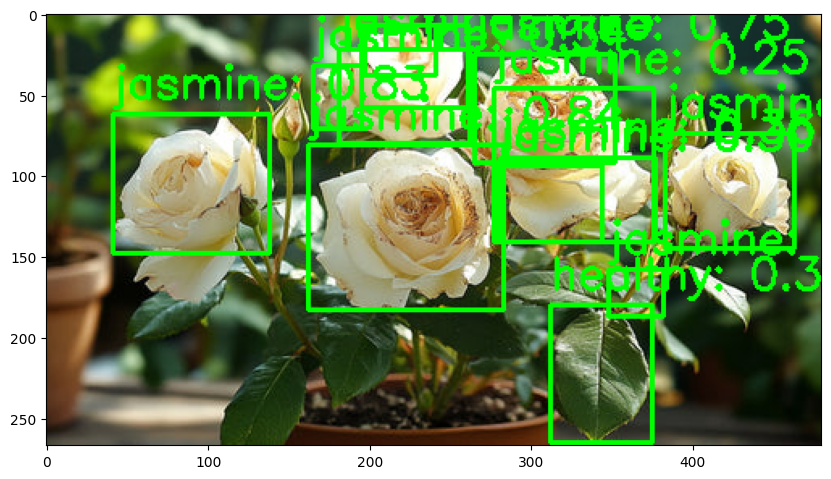

In [14]:
import cv2
import matplotlib.pyplot as plt


# Load the trained model. Replace with the actual path to your trained weights.
model_path = '/kaggle/working/runs/detect/train/weights/best.pt' # Update with the correct path to your trained weights
model = YOLO(model_path)

# Testing the Model
test_path = '/kaggle/working/indoor.jpg'
results = model.predict(source=test_path, save=True, conf=0.25)

# Print the bounding boxes, confidence scores, and class names.
for r in results:
    print(r.boxes) # Print bounding box information
    print(r.boxes.conf) # Print confidence scores
    print(r.boxes.cls) # Print predicted classes

# Display the image with bounding boxes
img = cv2.imread(test_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB format

for r in results:
    for box in r.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        cls = int(box.cls[0])
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding boxes
        text = f"{model.names[cls]}: {conf:.2f}"
        cv2.putText(img, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

# Saving the Model for Deployment

In [15]:
#from google.colab import files

# Using h5 format

In [16]:
#model.save('florys.h5')

# Using saved_model format

In [17]:
#odel.export(format='saved_model')

In [18]:
#!zip -r saved_model.zip /kaggle/working/runs/detect/train/weights/best_saved_model

In [19]:
'''from IPython.display import FileLink
FileLink(r'saved_model.zip')'''

"from IPython.display import FileLink\nFileLink(r'saved_model.zip')"

# Using the TF.js format

In [20]:
#model.export(format = 'tfjs')

In [21]:
#!zip -r tfjs.zip /kaggle/working/runs/detect/train/weights/best_web_model

In [22]:
'''from IPython.display import FileLink
FileLink(r'tfjs.zip')'''

"from IPython.display import FileLink\nFileLink(r'tfjs.zip')"

## Using the TFLite format

In [23]:
#model.save('florys.tflite')

In [24]:
#model.export(format='tflite')

In [25]:
#FileLink(r'runs/detect/train/weights/best_saved_model/best_float32.tflite')

In [26]:
#files.download('/kaggle/working/runs/detect/train2/weights/best_saved_model/best_float32.tflite')

## (Optional) Using PyTorch

In [27]:
#model.save('florys.pt')

In [28]:
#files.download('/content/florys.pt')

## (Optional) Save to onnx File

In [29]:
#model.save('florys.onnx')

In [30]:
#model.export(format='onnx')

In [31]:
#FileLink(r'runs/detect/train/weights/best.onnx')

In [32]:
#files.download('/content/runs/detect/train2/weights/best.onnx')